In [ ]:
# @title Importación Librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

import statsmodels.api as sm # Importa el módulo principal de statsmodels.
from statsmodels.formula.api import ols # Importa la función ols() (Ordinary Least Squares – mínimos cuadrados ordinarios) desde el submódulo formula.api de statsmodels.

In [ ]:
# @title Importo base de datos.
df = pd.read_csv("/content/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


##Análisis descriptivo

In [ ]:
desc_stats = df[["Age", "Heart rate", "Systolic blood pressure",
                 "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]].describe()

print("=== Estadística descriptiva ===")
print(desc_stats)

=== Estadística descriptiva ===
               Age   Heart rate  Systolic blood pressure  \
count  1319.000000  1319.000000              1319.000000   
mean     56.191812    78.336619               127.170584   
std      13.647315    51.630270                26.122720   
min      14.000000    20.000000                42.000000   
25%      47.000000    64.000000               110.000000   
50%      58.000000    74.000000               124.000000   
75%      65.000000    85.000000               143.000000   
max     103.000000  1111.000000               223.000000   

       Diastolic blood pressure  Blood sugar        CK-MB     Troponin  
count               1319.000000  1319.000000  1319.000000  1319.000000  
mean                  72.269143   146.634344    15.274306     0.360942  
std                   14.033924    74.923045    46.327083     1.154568  
min                   38.000000    35.000000     0.321000     0.001000  
25%                   62.000000    98.000000     1.655000     

In [ ]:
# @title Distribución de variables categóricas

print("\n=== Frecuencias de Gender ===")
print(df["Gender"].value_counts())

print("\n=== Frecuencias de Result ===")
print(df["Result"].value_counts())


=== Frecuencias de Gender ===
Gender
1    870
0    449
Name: count, dtype: int64

=== Frecuencias de Result ===
Result
positive    810
negative    509
Name: count, dtype: int64


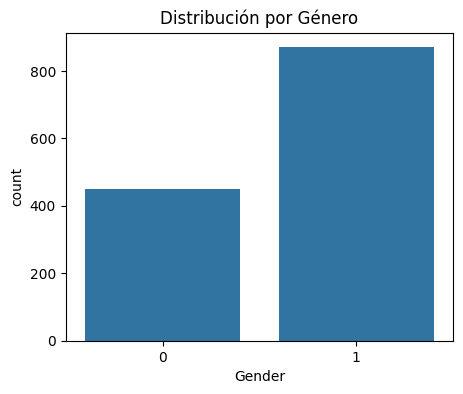

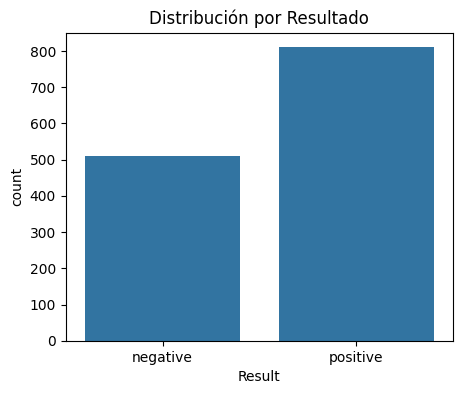

In [ ]:
# @title Gráficos de barras para variables categóricas

plt.figure(figsize=(5,4))
sns.countplot(x="Gender", data=df)
plt.title("Distribución por Género")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x="Result", data=df)
plt.title("Distribución por Resultado")
plt.show()

El dataset contiene 1319 pacientes con variables clínicas relacionadas a ataques cardíacos. Incluye variables numéricas como edad, frecuencia cardíaca, presión arterial, glucosa, enzimas cardíacas, y categóricas como género y diagnóstico final (positivo/negativo).

En cuanto a las variables categóricas, la distribución de pacientes es la siguiente:

Género: 870 hombres (66%) y 449 mujeres (34%).


Resultado diagnóstico: 810 positivos (61%) y 509 negativos (39%).



##Gráficos Boxplot en el contexto de Anova de 2 vías

El análisis exploratorio de datos (EDA) es el primer paso en cualquier estudio estadístico, y en el contexto de un ANOVA de dos vías, los diagramas de caja (boxplots) son una herramienta visual invaluable. Estos gráficos nos permiten ir más allá de las estadísticas descriptivas para obtener una comprensión intuitiva de la distribución de los datos y cómo se comportan en función de nuestras variables categóricas, como Result y Gender.

Beneficios de los Boxplots en el ANOVA de dos vías Estos gráficos sirven como un mapa para el análisis estadístico, ya que nos permiten anticipar los resultados formales de la prueba. La interpretación se centra en tres puntos clave, que se corresponden directamente con los componentes del ANOVA de dos vías:

Efectos Principales: Son el efecto independiente de cada variable categórica sobre la variable cuantitativa. Si las cajas de los subgrupos están en diferentes niveles, esto sugiere un efecto principal significativo. Por ejemplo, si los hombres tienen consistentemente una edad promedio más alta que las mujeres, esto es un efecto principal del género.

Interacción: Ocurre cuando el efecto de una variable categórica sobre la variable cuantitativa depende del nivel de la otra variable categórica. Si el patrón entre las cajas de los subgrupos no es consistente, se sospecha una interacción. Por ejemplo, si el efecto de un tratamiento es positivo en hombres, pero negativo en mujeres, hay una interacción.

Efectos Significativos: Es la conclusión de una prueba estadística que indica que la diferencia observada entre los grupos no es aleatoria y es probable que refleje una diferencia real en la población. Si las cajas son casi idénticas, no se esperan efectos significativos en el modelo.

En resumen, la visualización a través de boxplots es una fase esencial que proporciona un fundamento empírico para las pruebas estadísticas formales, permitiendo una interpretación más rica y fundamentada de los resultados del ANOVA de dos vías.

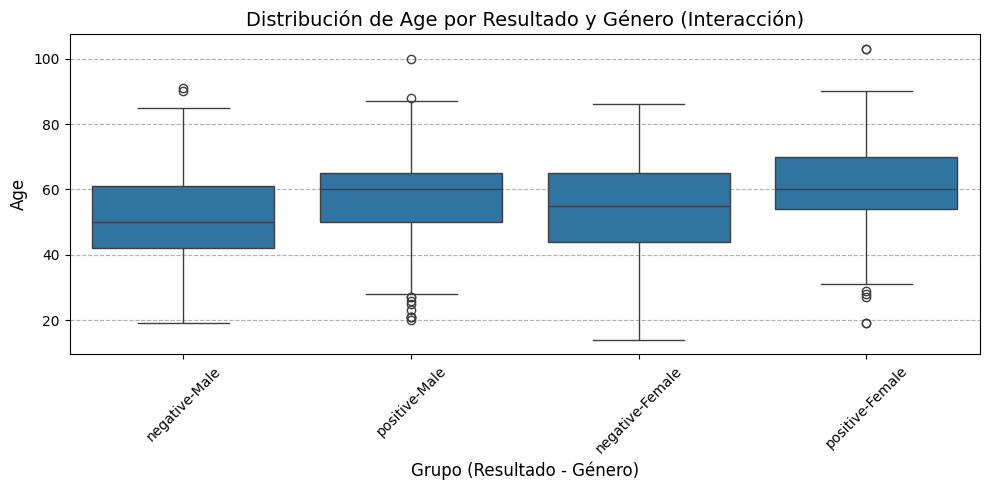

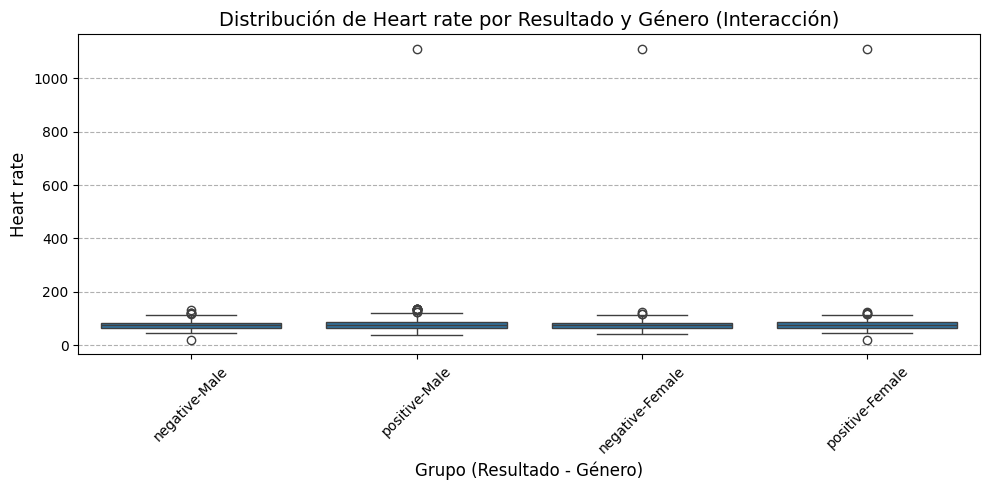

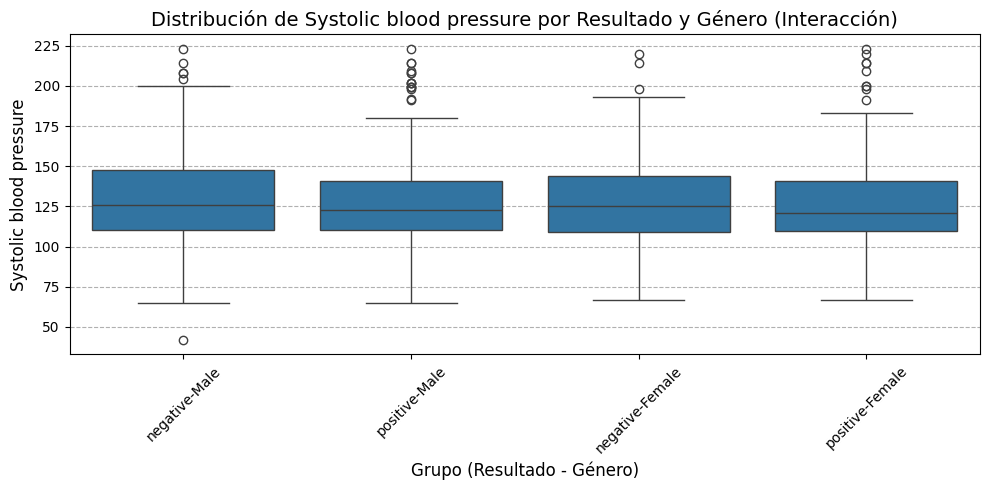

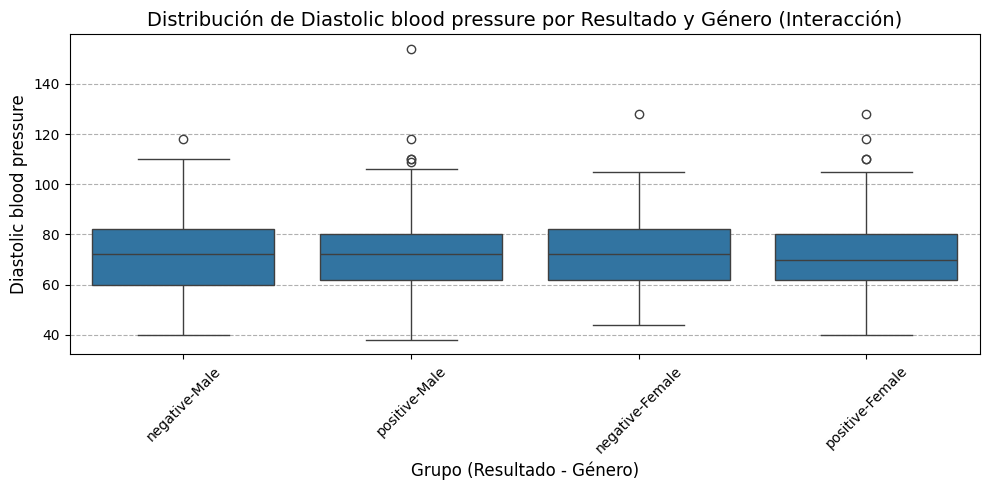

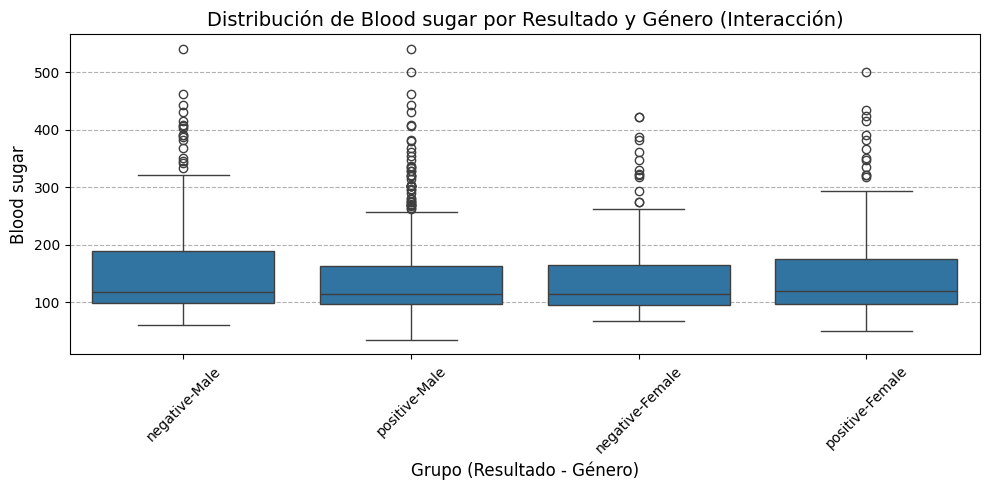

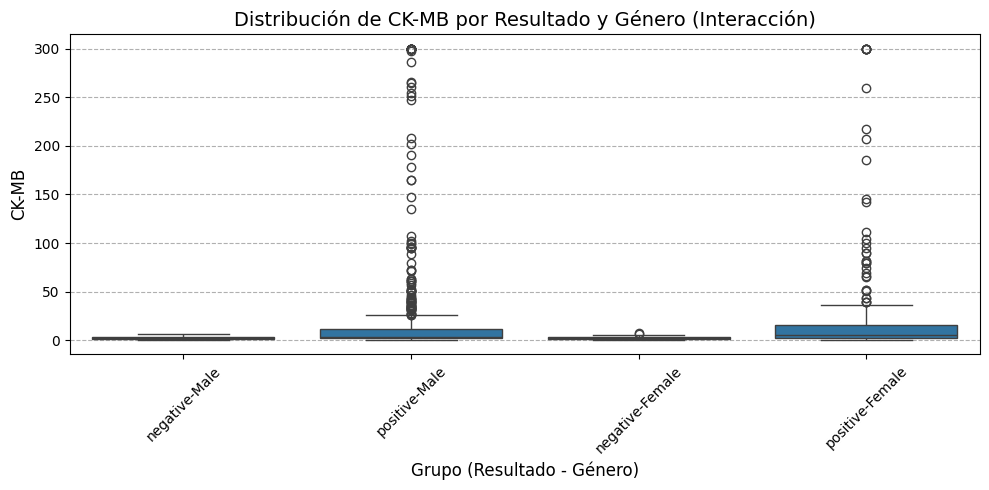

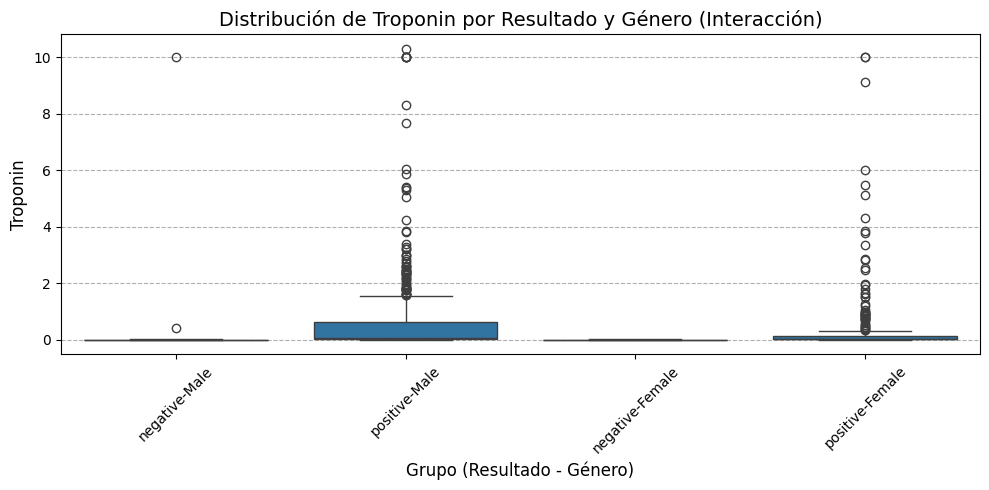

In [ ]:
# @title Gráficos de variables según género y resultado.
# Limpiar los nombres de las columnas (quitando espacios en blanco)
df.columns = [col.strip() for col in df.columns]

# Mapear los valores de la columna 'Gender' a etiquetas de texto
df["Gender"] = df["Gender"].map({1: "Male", 0: "Female"})

# Crear la columna de interacción combinando 'Result' y 'Gender'
df['Result_Gender'] = df['Result'].astype(str) + '-' + df['Gender'].astype(str)

# Lista de variables cuantitativas para graficar
variables_numericas = ['Age', 'Heart rate', 'Systolic blood pressure',
                       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

# Bucle para generar boxplots de interacción para cada variable
for var in variables_numericas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Result_Gender', y=var, data=df)
    plt.title(f'Distribución de {var} por Resultado y Género (Interacción)', fontsize=14)
    plt.xlabel('Grupo (Resultado - Género)', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

Interpretación de los gráficos y posterior relación con el análisis de varianza

Age: las personas con un resultado positivo tienden a ser mayores que las del grupo negativo. Los hombres tienden a ser un poco mayores que las mujeres. Las cajas mantienen una relación similar entre sí, lo que indica que el efecto del resultado no cambia mucho entre géneros. Este patrón es una clara señal de que hay efectos principales significativos para Result y Gender, pero que la interacción es probablemente no significativa.

Heart rate, Systolic & Diastolic blood pressure: las cuatro cajas se ven muy similares en su altura y posición. Esto visualmente sugiere que no hay diferencias importantes en la media de estas variables entre los grupos. Por lo tanto, se espera que el ANOVA de dos vías no encuentre ningún efecto significativo, ni para los efectos principales ni para la interacción.

Blood sugar: este gráfico es más complejo. Parece que la diferencia entre positivo y negativo es distinta para Masculino que para femenino. Este patrón visual es una de las principales formas de detectar una interacción significativa. El efecto de una variable (en este caso, Result) parece depender del nivel de la otra variable (Gender). El ANOVA de dos vías puede llegar a confirmar que solo la interacción es significativa, mientras que los efectos principales no lo son.

CK-MB & Troponin: las cajas para los grupos positivos (positive-Male y positive-Female) tienen un rango y una mediana mucho más altos en comparación con los grupos negativos, que están muy cerca de cero. Los grupos positivos son prácticamente idénticos entre sí, al igual que los grupos negativos. Esto visualmente sugiere un efecto principal muy fuerte del resultado, pero que no hay diferencia entre géneros ni un efecto de interacción. Esto refuerza la idea de que CK-MB y Troponin son marcadores clave y confiables para el resultado clínico, independientemente del género.

---

## ANOVA de dos vías para datos independientes.

El **ANOVA de dos vías** (o análisis de varianza factorial con dos factores) se utiliza para estudiar el efecto de **dos variables categóricas independientes** (factores) sobre una **variable cuantitativa dependiente**. Este análisis permite evaluar:

* El efecto **individual** de cada factor (**efectos principales**)
* El efecto de la **interacción** entre ambos factores

---

### Hipótesis del ANOVA de dos vías con interacción

Supongamos:

* $Y_{ijk}$: observación de la variable dependiente para el individuo $k$, en el nivel $i$ del factor A y el nivel $j$ del factor B
* $\mu$: media general
* $\alpha_i$: efecto del nivel $i$ del factor A (ej. `Result`)
* $\beta_j$: efecto del nivel $j$ del factor B (ej. `Gender`)
* $(\alpha\beta)_{ij}$: efecto de interacción entre A y B
* $\epsilon_{ijk}$: error aleatorio, asumido normalmente distribuido con media 0 y varianza constante

Entonces, el modelo se expresa como:

$$
Y_{ijk} = \mu + \alpha_i + \beta_j + (\alpha\beta)_{ij} + \epsilon_{ijk}
$$

Las **hipótesis nulas** a contrastar son:

1. **Sin efecto del factor A**:

   $$
   H_0^{(A)}: \alpha_1 = \alpha_2 = \dots = \alpha_a = 0
   $$

2. **Sin efecto del factor B**:

   $$
   H_0^{(B)}: \beta_1 = \beta_2 = \dots = \beta_b = 0
   $$

3. **Sin interacción entre A y B**:

   $$
   H_0^{(AB)}: (\alpha\beta)_{ij} = 0 \quad \forall i,j
   $$

Si alguna de estas hipótesis se rechaza, se concluye que ese factor (o su combinación) **influye significativamente** sobre la variable dependiente.

---

### Supuestos del modelo

Para que el ANOVA de dos vías sea válido, se deben cumplir los siguientes supuestos:

| Supuesto                      | ¿Qué se verifica?                                   | ¿Cómo se comprueba?                                      |
| ----------------------------- | --------------------------------------------------- | -------------------------------------------------------- |
| **Independencia**             | Que las observaciones sean independientes entre sí  | Depende del diseño del estudio (no se prueba con código) |
| **Normalidad**                | Que los **residuos** tengan distribución normal     | - Test de Shapiro-Wilk<br>- Gráfico Q-Q plot             |
| **Homogeneidad de varianzas** | Que todos los grupos tengan **varianzas similares** | - Test de Levene<br>- Test de Bartlett                   |

---



---

## Uso de ANOVA como paso previo a la regresión logística.

### Objetivo

El propósito de aplicar **ANOVA (Análisis de Varianza)** antes de construir un modelo de **regresión logística** es realizar una **exploración estadística preliminar** de las variables numéricas respecto a la variable dependiente categórica (`Result`). Este análisis permite:

* **Evaluar si existen diferencias significativas en las medias** de las variables numéricas entre los grupos (por ejemplo, pacientes con resultado positivo vs. negativo).
* **Detectar variables con potencial poder discriminativo**, que podrían ser útiles más adelante en el modelo predictivo.
* **Revisar supuestos, detectar outliers y errores de codificación** en etapas tempranas del análisis.


### Justificación

Aunque ANOVA no es un método de clasificación ni de predicción, **es útil como herramienta exploratoria** cuando se tiene una variable dependiente categórica binaria (como en la regresión logística). La lógica es la siguiente:

* Si una variable numérica **presenta diferencias estadísticamente significativas** entre los niveles de la variable dependiente (`Result`), es razonable suponer que **puede contribuir al modelo** al predecir la probabilidad de pertenecer a un grupo u otro.
* Si **no hay diferencias**, no necesariamente se descarta la variable, pero puede considerarse con menor prioridad, salvo que se justifique su inclusión por otros motivos (teóricos o interacción con otras variables).


El uso de ANOVA como paso previo a la regresión logística tiene un **objetivo exploratorio y estratégico**: detectar relaciones iniciales entre variables numéricas y la variable objetivo categórica, lo cual **enriquece el análisis** y **guía la selección de variables** en fases posteriores del modelado estadístico.

---


In [ ]:
df['Gender'] = df['Gender'].replace({0: 'male', 1: 'female'})
df['Gender'] = df['Gender'].astype('category')

In [ ]:
print(df['Gender'].unique())

['female', 'male']
Categories (2, object): ['female', 'male']


In [ ]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

variables_numericas = ['Age', 'Heart rate', 'Systolic blood pressure',
                       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

for var in variables_numericas:
    # Fórmula del modelo con dos factores y su interacción
    formula = f'Q("{var}") ~ C(Result) * C(Gender)'

    # Ajustar el modelo
    modelo = ols(formula, data=df).fit()

    # ANOVA de tipo II
    anova_result = sm.stats.anova_lm(modelo, typ=2) # Realiza ANOVA de dos vías utilizando suma de cuadrados Tipo II,
                                                    # adecuada para modelos con factores categóricos y posibles tamaños de grupo desiguales (desequilibrados).

    # Imprimir resultados
    print(f'ANOVA de dos vías para {var}:')
    print(anova_result)
    print('\n' + '-'*40 + '\n')


ANOVA de dos vías para Age:
                            sum_sq      df          F        PR(>F)
C(Result)             15094.781454     1.0  86.978455  4.492218e-20
C(Gender)              3296.040053     1.0  18.992290  1.414640e-05
C(Result):C(Gender)      51.064804     1.0   0.294243  5.876060e-01
Residual             228213.268620  1315.0        NaN           NaN

----------------------------------------

ANOVA de dos vías para Heart rate:
                           sum_sq      df         F    PR(>F)
C(Result)            3.165384e+02     1.0  0.118614  0.730597
C(Gender)            2.668061e+03     1.0  0.999786  0.317546
C(Result):C(Gender)  1.285679e+03     1.0  0.481774  0.487742
Residual             3.509251e+06  1315.0       NaN       NaN

----------------------------------------

ANOVA de dos vías para Systolic blood pressure:
                            sum_sq      df         F    PR(>F)
C(Result)               434.047689     1.0  0.635040  0.425657
C(Gender)               154

Resultados de **ANOVA de dos vías** para varias variables numéricas, usando los factores categóricos **`Result`** y **`Gender`**, y evaluando también su **interacción (`Result:Gender`)**.

---

## 1. **Age**

| Efecto                        | F     | p-valor    | Interpretación                                                      |
| ----------------------------- | ----- | ---------- | ------------------------------------------------------------------- |
| `Result`                      | 86.98 | 4.49e-20  | **Muy significativo**: Edad varía según resultado                   |
| `Gender`                      | 18.99 | 1.41e-5   | **Significativo**: Edad también varía con género                    |
| `Result:Gender` (interacción) | 0.29  | 0.588     | No hay interacción: el efecto de género es similar entre resultados |

**Conclusión**: Edad varía significativamente tanto con resultado como con género, pero **no hay interacción** entre ellos.

---

## 2. **Heart rate**

| Efecto      | p-valor | Interpretación          |
| ----------- | ------- | ----------------------- |
| `Result`    | 0.730  | No hay diferencias      |
| `Gender`    | 0.318  | Tampoco hay diferencias |
| Interacción | 0.488  | Sin interacción         |

**Conclusión**: Frecuencia cardíaca **no varía significativamente** por ninguno de los factores ni su interacción.

---

## 3. **Systolic blood pressure**

| Efecto      | p-valor | Interpretación     |
| ----------- | ------- | ------------------ |
| `Result`    | 0.426  | No hay diferencias |
| `Gender`    | 0.635  | No hay diferencias |
| Interacción | 0.774  | No hay interacción |

**Conclusión**: La presión sistólica **no se ve afectada** por resultado, género ni su combinación.

---

## 4. **Diastolic blood pressure**

Todos los p-valores > 0.7 →  No hay diferencias significativas en ningún efecto.

---

## 5. **Blood sugar**

| Efecto      | p-valor     | Interpretación    |
| ----------- | ----------- | ----------------- |
| `Result`    | 0.219      | No significativo  |
| `Gender`    | 0.721      | No significativo  |
| Interacción | **0.019** | **Significativo** |

**Conclusión**: No hay efectos principales, pero sí hay una **interacción significativa** →

> El efecto de `Result` sobre la glucosa **depende del género**, o viceversa.

---

## 6. **CK-MB**

| Efecto      | p-valor    | Interpretación    |
| ----------- | ---------- | ----------------- |
| `Result`    | 1.65e-15  | Muy significativo |
| `Gender`    | 0.910     | No significativo  |
| Interacción | 0.859     | No interacción    |

**Conclusión**: El nivel de CK-MB **varía claramente según el resultado**, pero **no** según el género ni por combinación.

---

## 7. **Troponin**

| Efecto      | p-valor    | Interpretación     |
| ----------- | ---------- | ------------------ |
| `Result`    | 1.54e-16  | Muy significativo  |
| `Gender`    | 0.098    | Casi significativo |
| Interacción | 0.339     | No interacción     |

**Conclusión**: Troponina se ve afectada claramente por el resultado, y **posiblemente** por género (pero débilmente).

---

### Tabla resumen de significancia del ANOVA

| Variable                | `Result` | `Gender` | Interacción | Conclusión clave                                                                    |
| ----------------------- | -------- | -------- | ----------- | ----------------------------------------------------------------------------------- |
| **Edad**                | **Sí**   | **Sí**   | No          | Ambos factores afectan la edad; sin interacción significativa.                      |
| **Frecuencia cardiaca** | No       | No       | No          | Ningún efecto significativo.                                                        |
| **Presión sistólica**   | No       | No       | No          | Ningún efecto significativo.                                                        |
| **Presión diastólica**  | No       | No       | No          | Ningún efecto significativo.                                                        |
| **Glucemia**            | No       | No       | **Sí**      | Interacción significativa entre resultado y género.                                 |
| **CK-MB**               | **Sí**   | No       | No          | Afectado significativamente por `Result`.                                           |
| **Troponina**           | **Sí**   | \*Sí     | No          | Influenciada por `Result`; posible efecto del género (marginalmente significativo). |

---

### Notas:

* **Sí**: Significativo (p < 0.05)
* \*Sí: Tendencia marginal (0.05 < p < 0.1)
* No: No significativo

---



## Resumen ANOVA dos vías

| Variable                     | Result (p)       | Gender (p)       | Interacción (p)    | Interpretación                                      |
| ---------------------------- | ---------------- | ---------------- | ------------------ | --------------------------------------------------- |
| **Age**                      | 4.49e-20 (<0.05) | 1.41e-05 (<0.05) | 0.5876 (>0.05)     | Result y Gender afectan edad, no interacción        |
| **Heart rate**               | 0.7306 (>0.05)   | 0.3175 (>0.05)   | 0.4877 (>0.05)     | Ningún efecto significativo                         |
| **Systolic blood pressure**  | 0.4257 (>0.05)   | 0.6350 (>0.05)   | 0.7745 (>0.05)     | Ningún efecto significativo                         |
| **Diastolic blood pressure** | 0.7493 (>0.05)   | 0.7580 (>0.05)   | 0.7212 (>0.05)     | Ningún efecto significativo                         |
| **Blood sugar**              | 0.2188 (>0.05)   | 0.7207 (>0.05)   | **0.0197 (<0.05)** | Solo interacción significativa                      |
| **CK-MB**                    | 1.65e-15 (<0.05) | 0.9099 (>0.05)   | 0.8592 (>0.05)     | Solo Result afecta                                  |
| **Troponin**                 | 1.54e-16 (<0.05) | 0.0984 (>0.05)   | 0.3390 (>0.05)     | Solo Result afecta (cercano a significativo Gender) |

---

## En base a las salidas obtenidas en el ANOVA de dos vías seleccionamos las variables para analizar en un post-hoc con Tukey.

* **Age**: Tukey para `Result` y `Gender` (pero no para la interacción).
* **Blood sugar**: Tukey solo para la interacción `Result-Gender`.
* **CK-MB**: Tukey solo para `Result`.
* **Troponin**: Tukey solo para `Result` (aunque Gender está cerca de ser significativo).

Las demás variables no presentan efectos significativos en ANOVA, por lo que no es necesario hacer Tukey post hoc (porque no hay diferencias globales entre grupos).




## Análisis post-hoc (comparaciones múltiples).

Después de hacer un ANOVA, si hay diferencias significativas en algún factor o en la interacción, el ANOVA no te dice específicamente entre qué grupos están esas diferencias. Solo te dice que al menos un grupo difiere.

Entonces, entra el análisis post-hoc que permite comparar pares específicos de grupos para saber exactamente cuáles son diferentes entre sí.

Para hacer post-hoc después de ANOVA con dos factores, lo común es usar **Tukey HSD** para comparar pares de grupos.

Como hay dos factores (Result y Gender), se pude:

* Hacer post-hoc para Result.

* Hacer post-hoc para Gender.

* Hacer post-hoc para la interacción (combinación Result-Gender).


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df['Result_Gender'] = df['Result'].astype(str) + '-' + df['Gender'].astype(str)

# Para Age (Result y Gender)
print("Tukey para Age por Result")
print(pairwise_tukeyhsd(endog=df['Age'], groups=df['Result'], alpha=0.05).summary()) # alpha representa el nivel de significancia usado en la prueba post hoc de Tukey HSD (Honest Significant Difference).
print("\n")

print("Tukey para Age por Gender")
print(pairwise_tukeyhsd(endog=df['Age'], groups=df['Gender'], alpha=0.05).summary())
print("\n")

# Para Blood sugar (solo interacción)
print("Tukey para Blood sugar por interacción Result-Gender")
print(pairwise_tukeyhsd(endog=df['Blood sugar'], groups=df['Result_Gender'], alpha=0.05).summary())
print("\n")

# Para CK-MB (solo Result)
print("Tukey para CK-MB por Result")
print(pairwise_tukeyhsd(endog=df['CK-MB'], groups=df['Result'], alpha=0.05).summary())
print("\n")

# Para Troponin (solo Result)
print("Tukey para Troponin por Result")
print(pairwise_tukeyhsd(endog=df['Troponin'], groups=df['Result'], alpha=0.05).summary())
print("\n")

Tukey para Age por Result
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1   group2  meandiff p-adj lower upper  reject
----------------------------------------------------
negative positive   6.6724   0.0 5.201 8.1437   True
----------------------------------------------------


Tukey para Age por Gender
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
female   male   2.6738 0.0007 1.1243 4.2234   True
--------------------------------------------------


Tukey para Blood sugar por interacción Result-Gender
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
negative-female   negative-male -13.6608 0.1827 -31.0947   3.773  False
negative-female positive-female -12.6498 0.0808 -26.3024  1.0027  False
negative-f

### 1. **Tukey para Age por Result**

| group1   | group2   | meandiff | p-adj | lower | upper  | reject |
| -------- | -------- | -------- | ----- | ----- | ------ | ------ |
| negative | positive | 6.6724   | 0.0   | 5.201 | 8.1437 | True   |

* **Interpretación:**
  La diferencia promedio de edad entre los grupos *negative* y *positive* es aproximadamente **6.67 años**, y es estadísticamente significativa (p < 0.05).
  El intervalo de confianza no incluye cero, y el test **rechaza la hipótesis nula** de que no hay diferencia.
  Esto indica que las personas en el grupo *positive* son significativamente mayores (o menores) que las del grupo *negative*.

---

### 2. **Tukey para Age por Gender**

| group1 | group2 | meandiff | p-adj  | lower  | upper  | reject |
| ------ | ------ | -------- | ------ | ------ | ------ | ------ |
| female | male   | 2.6738   | 0.0007 | 1.1243 | 4.2234 | True   |

* **Interpretación:**
  La diferencia promedio de edad entre mujeres y hombres es de **2.67 años**, también significativa.
  Por lo tanto, la edad media de los hombres y las mujeres difiere significativamente.

---

### 3. **Tukey para Blood sugar por interacción Result-Gender**

| group1          | group2          | meandiff | p-adj  | lower    | upper   | reject |
| --------------- | --------------- | -------- | ------ | -------- | ------- | ------ |
| negative-female | negative-male   | -13.6608 | 0.1827 | -31.0947 | 3.773   | False  |
| negative-female | positive-female | -12.6498 | 0.0808 | -26.3024 | 1.0027  | False  |
| negative-female | positive-male   | -5.6245  | 0.8155 | -22.0726 | 10.8236 | False  |
| negative-male   | positive-female | 1.011    | 0.9984 | -14.7716 | 16.7936 | False  |
| negative-male   | positive-male   | 8.0363   | 0.6695 | -10.2185 | 26.2912 | False  |
| positive-female | positive-male   | 7.0253   | 0.6075 | -7.6612  | 21.7119 | False  |

* **Interpretación:**
  Ninguna comparación entre los subgrupos de *Blood sugar* considerando la interacción `Result-Gender` es estadísticamente significativa (todos los p-adj > 0.05).
  Esto indica que aunque la interacción fue significativa en el ANOVA, las diferencias entre pares específicos no son claras o no son suficientemente fuertes para ser detectadas aquí.

---

### 4. **Tukey para CK-MB por Result**

| group1   | group2   | meandiff | p-adj | lower   | upper   | reject |
| -------- | -------- | -------- | ----- | ------- | ------- | ------ |
| negative | positive | 20.7115  | 0.0   | 15.6924 | 25.7306 | True   |

* **Interpretación:**
  Existe una diferencia promedio significativa en niveles de CK-MB entre los grupos *negative* y *positive*, siendo aproximadamente 20.7 unidades diferente.
  Esta diferencia es estadísticamente significativa.

---

### 5. **Tukey para Troponin por Result**

| group1   | group2   | meandiff | p-adj | lower  | upper  | reject |
| -------- | -------- | -------- | ----- | ------ | ------ | ------ |
| negative | positive | 0.5438   | 0.0   | 0.4191 | 0.6686 | True   |

* **Interpretación:**
  También hay una diferencia significativa en niveles de Troponina entre los grupos *negative* y *positive*, con una diferencia media de 0.54 unidades.

---

### **Resumen general**

* Para **Age**, hay diferencias significativas tanto entre *Result* (negative vs positive) como entre *Gender* (female vs male).
* Para **Blood sugar**, aunque la interacción en ANOVA fue significativa, las comparaciones por pares no mostraron diferencias claras.
* Para **CK-MB** y **Troponin**, el factor *Result* sí presenta diferencias significativas entre grupos.
* No se observan diferencias significativas para Blood sugar en los pares, pese a la interacción significativa.


> ## **Conclusión del análisis ANOVA de dos vías.**

> El análisis de varianza de dos vías permitió examinar cómo varían diferentes variables biomédicas y demográficas según los factores Result (resultado clínico) y Gender (género), así como su interacción.
>
> Los resultados indican lo siguiente:
>
> * **Edad (Age)** mostró diferencias significativas tanto por resultado clínico como por género, sugiriendo variaciones sistemáticas en la distribución etaria entre grupos, con posibles implicancias médicas.
> * **CK-MB** y **Troponin**, marcadores clave de daño miocárdico, presentaron diferencias significativas según el resultado clínico, reforzando su utilidad en diagnóstico y seguimiento.
> * **Blood sugar** no evidenció diferencias significativas por separado respecto a Result o Gender, pero sí una interacción significativa entre ambos factores, lo que implica que el efecto de un factor depende del nivel del otro. Este hallazgo amerita un análisis más detallado.
> * Variables como la frecuencia cardíaca y la presión arterial (sistólica y diastólica) no mostraron diferencias estadísticamente significativas entre grupos.
>
> **Implicaciones para modelo de regresión logística**
> Basado en estos resultados, se priorizará incluir Age, CK-MB y Troponin como predictores en un modelo de regresión logística para predecir el estado clínico. Asimismo, se evaluará incorporar Blood sugar junto con su interacción con Gender. Variables sin evidencia clara de efecto podrían ser excluidas, considerando también criterios clínicos y estadísticos adicionales.

---

# **Análisis de supuestos del ANOVA de dos vías**

El ANOVA requiere que se cumplan tres supuestos principales:

1. **Independencia**  
   Cada observación debe provenir de un individuo distinto.  
   *En este dataset se asume por diseño: cada fila es un paciente independiente.*

2. **Normalidad de los residuos**  
   Los residuos del modelo (observado – valor ajustado) deben seguir una distribución normal.  
   Se verifica con:
   * Test de Shapiro–Wilk.
   * Gráfico Q–Q (quantile–quantile).

3. **Homogeneidad de varianzas**  
   La varianza de la variable dependiente debe ser similar en todos los grupos.  
   Se verifica con:
   * Test de Levene.

En esta sección se evaluarán estos supuestos para las variables que en el ANOVA mostraron algún efecto significativo:
- **Age**
- **Blood sugar** (por interacción Result–Gender)
- **CK-MB**
- **Troponin**


### Supuestos para Age ###
Shapiro–Wilk p-value (normalidad): 0.0000158058


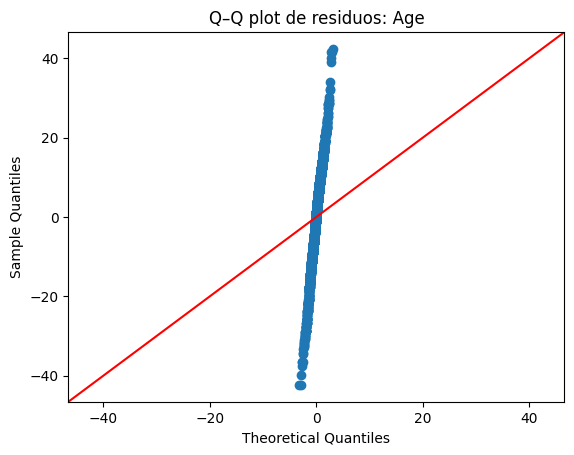

Levene p-value (varianzas homogéneas): 0.0249388071

### Supuestos para Blood sugar ###
Shapiro–Wilk p-value (normalidad): 4.88e-38


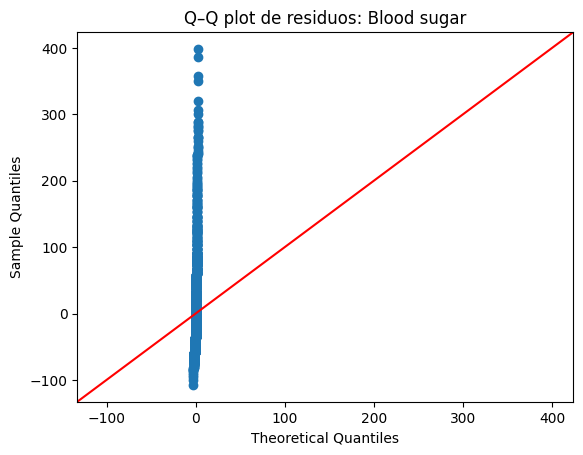

Levene p-value (varianzas homogéneas): 0.0740460853

### Supuestos para CK-MB ###
Shapiro–Wilk p-value (normalidad): 3.07e-54


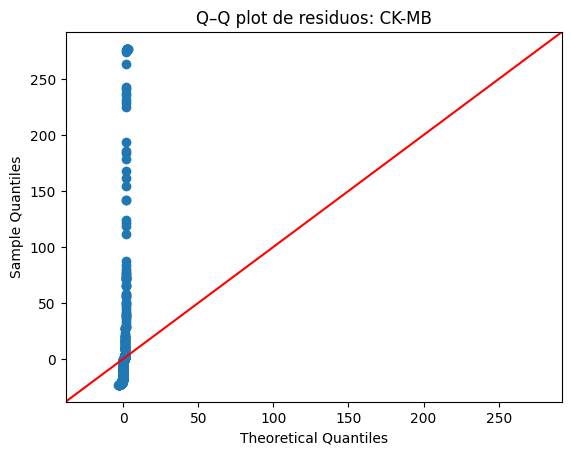

Levene p-value (varianzas homogéneas): 1.77e-13

### Supuestos para Troponin ###
Shapiro–Wilk p-value (normalidad): 1.21e-53


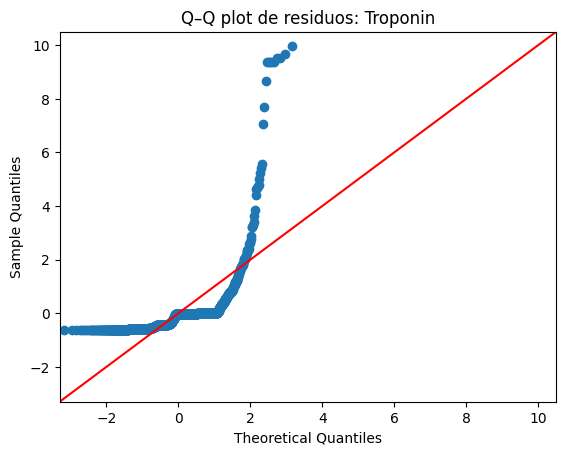

Levene p-value (varianzas homogéneas): 1.63e-15


In [ ]:
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Variables que mostraron efectos significativos en el ANOVA
variables_significativas = ['Age', 'Blood sugar', 'CK-MB', 'Troponin']

def formato_p_extenso(p):
    """
    Devuelve el p-value con más precisión:
    - Si es mayor o igual a 1e-10, imprime 10 decimales.
    - Si es más pequeño, usa notación científica.
    """
    return f"{p:.10f}" if p >= 1e-10 else f"{p:.2e}"

for var in variables_significativas:
    print(f"\n### Supuestos para {var} ###")

    # Ajuste del modelo ANOVA de dos vías con interacción
    formula = f'Q("{var}") ~ C(Result) * C(Gender)'
    modelo = ols(formula, data=df).fit()

    # --- Normalidad de residuos ---
    _, p_shapiro = shapiro(modelo.resid)
    print(f"Shapiro–Wilk p-value (normalidad): {formato_p_extenso(p_shapiro)}")

    # Gráfico Q–Q
    sm.qqplot(modelo.resid, line='45')
    plt.title(f"Q–Q plot de residuos: {var}")
    plt.show()

    # --- Homogeneidad de varianzas ---
    grupos = [g[var].values for _, g in df.groupby(['Result','Gender'], observed=True)]
    _, p_lev = levene(*grupos)
    print(f"Levene p-value (varianzas homogéneas): {formato_p_extenso(p_lev)}")

### Análisis de supuestos

Los resultados de las pruebas confirman que **el modelo ANOVA de dos vías no cumple los supuestos clásicos**:

#### Resumen de p-values

| Variable       | Shapiro–Wilk (normalidad) | Levene (homogeneidad) | Conclusión                             |
|----------------|---------------------------|-----------------------|----------------------------------------|
| **Age**       | 0.0000158                 | 0.0249               | No normal, varianzas desiguales        |
| **Blood sugar**| 4.88e-38                 | 0.0740               | No normal, varianzas ≈ homogéneas      |
| **CK-MB**     | 3.07e-54                 | 1.77e-13             | No normal, varianzas desiguales        |
| **Troponin**  | 1.21e-53                 | 1.63e-15             | No normal, varianzas desiguales        |

#### Interpretación
* **Normalidad:** todos los p-values de Shapiro–Wilk son < 0.05, por lo que **ninguna variable cumple el supuesto de normalidad de los residuos**.  
  Los Q–Q plots muestran fuertes desviaciones de la línea teórica, reforzando este hallazgo.

* **Homogeneidad de varianzas:**  
  - *Age, CK-MB y Troponin* presentan p < 0.05 → varianzas heterogéneas.  
  - *Blood sugar* p ≈ 0.07 → podría considerarse con varianzas homogéneas.

#### Recomendaciones
Dado que los supuestos clásicos no se cumplen:

* Para **Age, CK-MB y Troponin** se recomienda:
  - ANOVA de Welch (robusto a varianzas desiguales), o
  - pruebas no paramétricas como Kruskal–Wallis, o
  - aplicar transformaciones (log, Box–Cox) y re-evaluar.

* Para **Blood sugar**:
  - aunque la homogeneidad es aceptable, la normalidad no se cumple,
  - se aconseja igualmente Welch o una prueba no paramétrica.

#### Conclusión general
El análisis de supuestos muestra que el ANOVA de dos vías debe interpretarse **con precaución**.  
Los efectos significativos detectados (por ejemplo en CK-MB y Troponin) conviene confirmarlos con métodos robustos para asegurar la validez de las inferencias.